<a href="https://colab.research.google.com/github/uptrain-ai/uptrain/blob/main/examples/checks/language_features/tone_critique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center">
  <a href="https://uptrain.ai">
    <img width="300" src="https://user-images.githubusercontent.com/108270398/214240695-4f958b76-c993-4ddd-8de6-8668f4d0da84.png" alt="uptrain">
  </a>
</h1>

<h1 style="text-align: center;">Evaluating Critique Tone</h1>

**What is Critique Tone Evaluation?**: Critique tone evaluation involves assessing the language model's output in terms of the tone used when following or deviating from guidelines. It aims to ensure that the language model not only adheres to guidelines but also communicates its adherence or deviations in an appropriate and respectful manner.

For example, in the context of the appointment booking chatbot, if the LLM decides to redirect a user query to a human agent (as per the guideline), the critique tone evaluation would assess how well the LLM communicates this redirection to the user. A polite and informative tone would be desirable.

| Column Name | Description |
| ----------- | ----------- |
| response | The response given by the model |
| llm_persona | The persona the LLM being assessed was exposed to follow |

## Step 1: Install UpTrain by running 'pip install uptrain'

In [1]:
#!pip install uptrain

## Step 2: Let's define our dataset to run evaluations upon

In [2]:
strict_teacher_data = [
    {"response": "Mitosis is a cell division process that results in two identical daughter cells, each with the same number of chromosomes as the parent cell. Meiosis, on the other hand, is a special type of cell division that produces four non-identical haploid cells, each with half the number of chromosomes of the parent cell."},

    {"response": "The law of conservation of energy states that energy cannot be created or destroyed, only transformed from one form to another. In a closed system, the total amount of energy remains constant."},

    {"response": "Balancing a chemical equation involves ensuring that the number of atoms of each element on the reactant side is equal to the number of atoms of the same element on the product side. This is achieved by adjusting coefficients in front of the chemical formulas."},

    {"response": "Velocity is a vector quantity that measures the rate of change of an object's displacement with respect to time, including both speed and direction. Acceleration, on the other hand, is the rate of change of velocity with respect to time."},

    {"response": "Shakespeare is considered one of the greatest playwrights due to his unparalleled skill in capturing the complexity of human nature, his mastery of language and poetic expression, and the enduring relevance of his works, which explore universal themes."},
]

fun_teacher_data = [
    {"response": "Mitosis and meiosis are like the yin and yang of cell division. Mitosis makes mini-me cells, identical and ready for action, while meiosis is the wild party where cells swap genetic goodies, creating a diverse bunch of offspring."},

    {"response": "Picture this: energy is like a cosmic disco ball that never stops grooving. The law of conservation of energy says the total party vibes in a closed system remain constant. No energy left behind on the dance floor!"},

    {"response": "Balancing a chemical equation is like creating a chemical masterpiece! Just sprinkle some coefficients here and there until you've got the perfect formula dance. It's a choreography of atoms."},

    {"response": "Velocity is like speed's fancy cousin with a sense of direction – it's the total package! Acceleration, on the other hand, is like the speedometer on a roller coaster – it tells you how fast you're picking up speed."},

    {"response": "Shakespeare, the OG drama queen! He's the ultimate wordsmith, the grand poobah of poetic prowess. His plays are like timeless memes, connecting with us through the ages. It's Shakespeare's world; we're just living in it!"},
]

data = strict_teacher_data + fun_teacher_data

## Step 3: Running evaluations using UpTrain's Open-Source Software (OSS)

In [3]:
from uptrain import EvalLLM, Evals, CritiqueTone
import json

OPENAI_API_KEY = "sk-********************"  # Insert your OpenAI key here

eval_llm = EvalLLM(openai_api_key=OPENAI_API_KEY)

res = eval_llm.evaluate(
    data = data,
    checks = [CritiqueTone(llm_persona="methodical teacher")]
)

2024-01-31 19:11:56.057 | INFO     | uptrain.framework.evalllm:evaluate:104 - Sending evaluation request for rows 0 to <50 to the Uptrain


In [4]:
print(json.dumps(res,indent=3))

[
   {
      "response": "Mitosis is a cell division process that results in two identical daughter cells, each with the same number of chromosomes as the parent cell. Meiosis, on the other hand, is a special type of cell division that produces four non-identical haploid cells, each with half the number of chromosomes of the parent cell.",
      "score_tone": 1.0,
      "explanation_tone": "[Persona]: methodical teacher\n[Response]: The provided response accurately explains the processes of mitosis and meiosis in a clear and methodical manner, aligning well with the specified persona.\n[Score]: 5"
   },
   {
      "response": "The law of conservation of energy states that energy cannot be created or destroyed, only transformed from one form to another. In a closed system, the total amount of energy remains constant.",
      "score_tone": 1.0,
      "explanation_tone": "[Persona]: methodical teacher\n[Response]: The law of conservation of energy states that energy cannot be created or d

## Step 4: Let's look at some of the results 

### Tone Critique of Strict Teacher

In [5]:
print(json.dumps(res[0],indent=3))

{
   "response": "Mitosis is a cell division process that results in two identical daughter cells, each with the same number of chromosomes as the parent cell. Meiosis, on the other hand, is a special type of cell division that produces four non-identical haploid cells, each with half the number of chromosomes of the parent cell.",
   "score_tone": 1.0,
   "explanation_tone": "[Persona]: methodical teacher\n[Response]: The provided response accurately explains the processes of mitosis and meiosis in a clear and methodical manner, aligning well with the specified persona.\n[Score]: 5"
}


### Tone Critique of Fun Teacher

In [6]:
print(json.dumps(res[5],indent=3))

{
   "response": "Mitosis and meiosis are like the yin and yang of cell division. Mitosis makes mini-me cells, identical and ready for action, while meiosis is the wild party where cells swap genetic goodies, creating a diverse bunch of offspring.",
   "score_tone": 0.4,
   "explanation_tone": "The provided response does not align with the specified persona of a methodical teacher. The use of casual and informal language, as well as the comparison of mitosis and meiosis to \"yin and yang\" and \"wild party,\" does not reflect a methodical and structured approach to teaching. The response lacks the precision and clarity expected from a methodical teacher.\n\n[Score]: 2"
}


## [Optional] Step 5: UpTrain Managed Service and Dashboards

You can create a free UpTrain account [here](https://uptrain.ai/) and get free trial credits. If you want more trial credits, [book a call with the maintainers of UpTrain here](https://calendly.com/uptrain-sourabh/30min).

UpTrain Managed service provides:
1. Dashboards with advanced drill-down and filtering options
2. Insights and common topics among failing cases
3. Observability and real-time monitoring of production data
4. Regression testing via seamless integration with your CI/CD pipelines

In [7]:
from uptrain import APIClient, Evals
import json

UPTRAIN_API_KEY = "up-********************"  # Insert your UpTrain key here

uptrain_client = APIClient(uptrain_api_key=UPTRAIN_API_KEY)

res = uptrain_client.log_and_evaluate(
    "Sample-tone-critique",
    data = data,
    checks = [CritiqueTone(llm_persona="methodical teacher")]
)

2024-01-31 19:12:04.249 | INFO     | uptrain.framework.remote:log_and_evaluate:511 - Sending evaluation request for rows 0 to <50 to the Uptrain server


In [8]:
print(json.dumps(res,indent=3))

[
   {
      "response": "Mitosis is a cell division process that results in two identical daughter cells, each with the same number of chromosomes as the parent cell. Meiosis, on the other hand, is a special type of cell division that produces four non-identical haploid cells, each with half the number of chromosomes of the parent cell.",
      "score_tone": 1.0,
      "explanation_tone": "[Persona]: methodical teacher\n[Response]: The provided response accurately explains the concepts of mitosis and meiosis in a clear and methodical manner, aligning well with the specified persona of a methodical teacher.\n[Score]: 5"
   },
   {
      "response": "The law of conservation of energy states that energy cannot be created or destroyed, only transformed from one form to another. In a closed system, the total amount of energy remains constant.",
      "score_tone": 1.0,
      "explanation_tone": "The response provides a clear and concise explanation of the law of conservation of energy, whi

### Dashboards: 
Histogram of score vs number of cases with that score

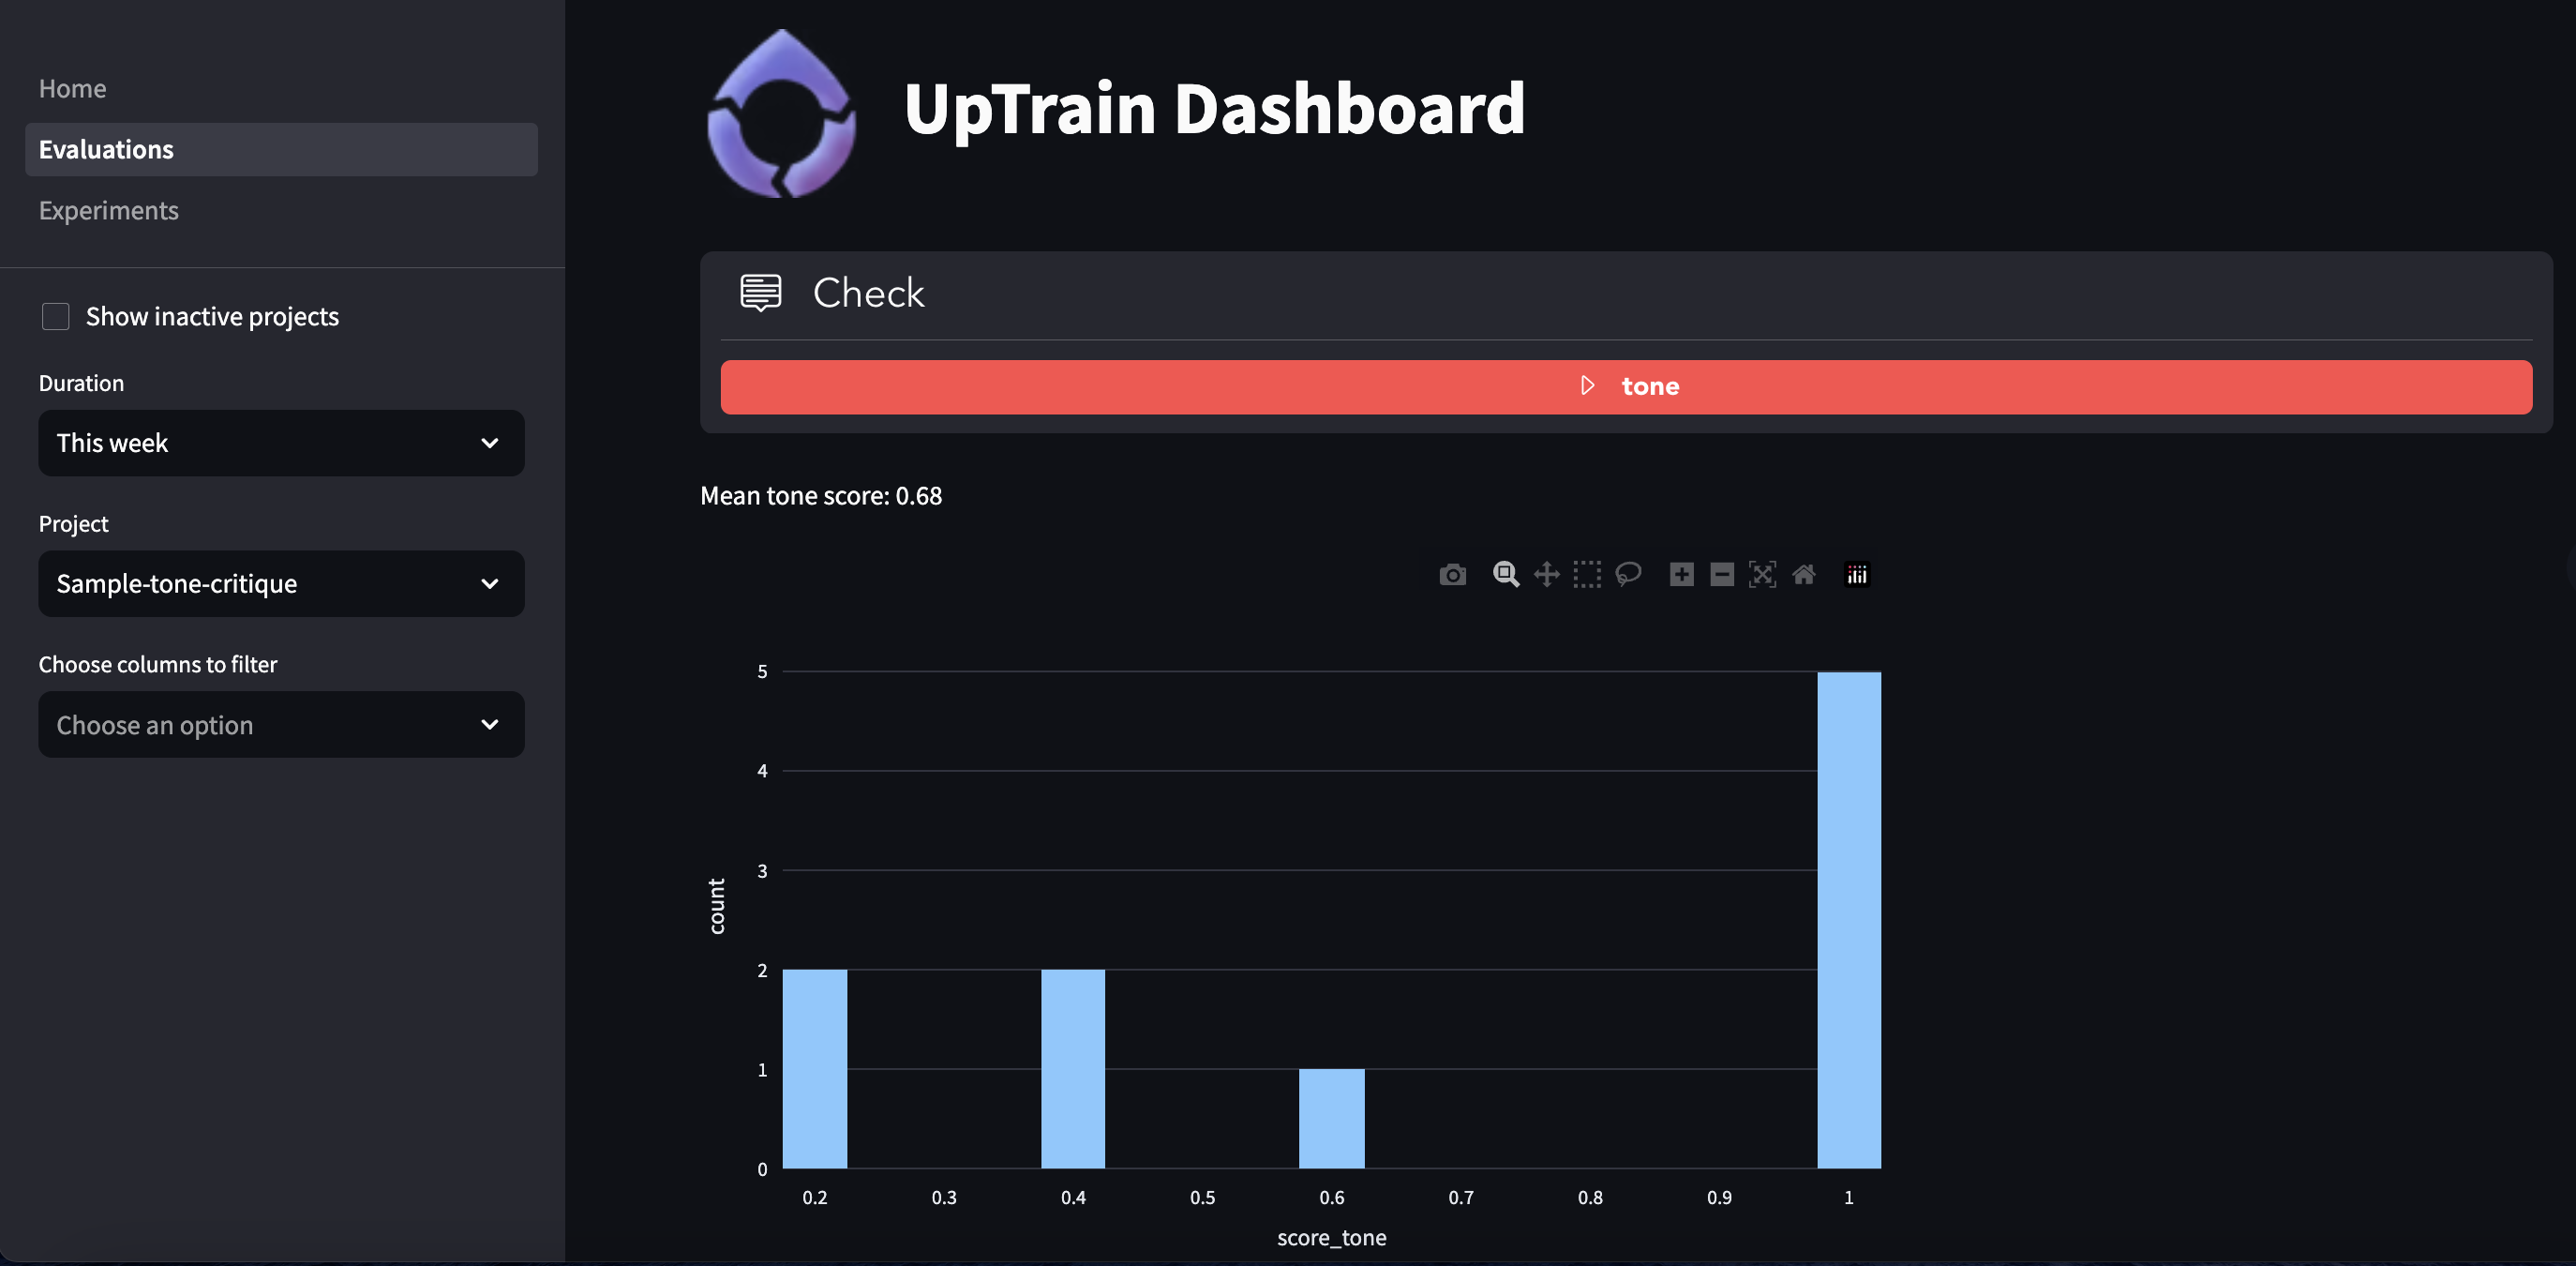

### Insights:
You can filter failure cases and generate common topics among them. This can help identify the core issue and help fix it

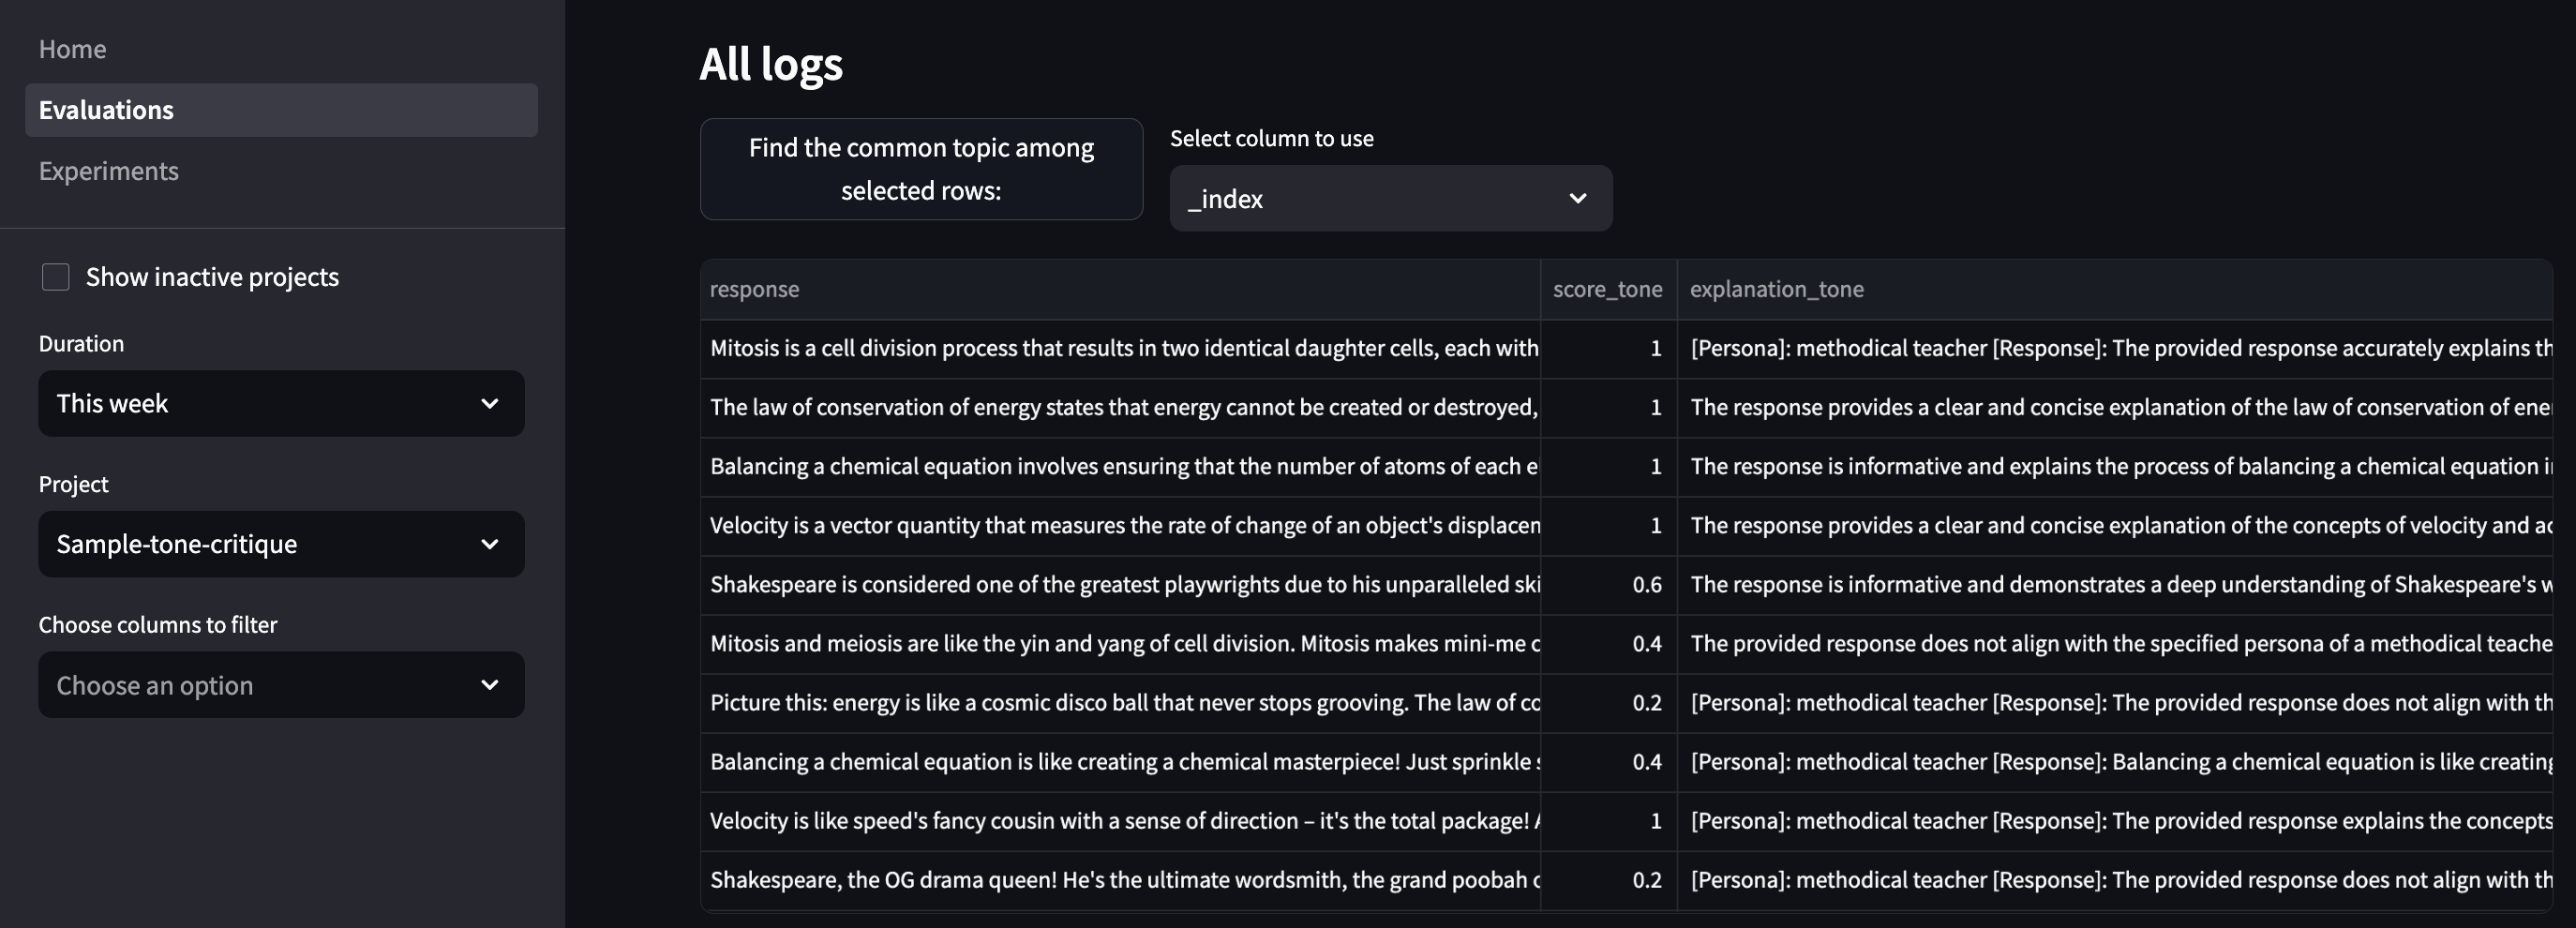